In [ ]:
# Final Project Submission

Please fill out:
* Student name: 
* Student pace: full time Hybrid
* Scheduled project review date/time: 
* Instructor name: William Okomba

# **Business Understanding & Objective**  

## **Business Understanding**  
Business Understanding
In the financial sector, customer complaints serve as a crucial source of insight into potential issues with products and services. Addressing these complaints efficiently not only minimizes customer dissatisfaction but also fosters loyalty and enhances the company’s reputation. However, financial institutions offering multiple services—such as credit cards, banking, and mortgage/loan services—receive a vast number of complaints daily.

Manually categorizing and routing these complaints to the appropriate departments is inefficient, costly, and prone to errors. Automating this process will streamline customer support, reduce response times, and improve overall customer satisfaction.

To achieve this, the company seeks to leverage Natural Language Processing (NLP) to analyze and categorize customer complaints effectively. Using topic modeling, the aim is to identify recurring themes in complaints, enabling better understanding of customer pain points and optimizing complaint resolution workflows. Ultimately, this will facilitate the development of a model, which will be trained to classify new customer complaints into predefined categories automatically.

## **Business Objective**  
### **Business Objectives**

1. To automate the classification of customer complaints based on financial products and services.  
2. To enhance complaint resolution efficiency by routing support tickets to the appropriate departments automatically.  
3. To improve customer satisfaction by reducing complaint response times and ensuring accurate resolution.  
4. To identify recurring themes and pain points in customer complaints using **topic modeling**.  
.  

To achieve this, we will apply **topic modeling** to identify patterns and recurring words in the complaint data. Since the dataset is unstructured and lacks labels, **unsupervised learning techniques** will be used to group complaints into five categories:  

1. **Credit Card / Prepaid Card**  
2. **Bank Account Services**  
3. **Theft/Dispute Reporting**  
4. **Mortgages/Loans**  
5. **Others**  

Once topic modeling is complete, the categorized data can be used to train a **supervised learning model** for **real-time classification** of incoming complaints.  



In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import json




pd.set_option("display.max_columns", 500)

## Load JSON file

In [273]:
# Define the file path
#file_path = "/home/western/Documents/data/complaints.json"
#file_path = "/content/drive/MyDrive/ML datasets/complaints.json"
file_path = "/content/drive/MyDrive/Data/complaints.json"

# Load JSON file using
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0.0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0.0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0.0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0.0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0.0,"{'tags': None, 'zip_code': '10473', 'complaint..."


## Correcting data Structure
- Ensure proper structure of the columns
- Drop _source column and join the new columns to the dataset df

In [274]:
# Normalize _source column (assumes _source contains dictionaries)
df_source = pd.json_normalize(df["_source"])

# Drop the original _source column and merge with expanded data
df = df.drop(columns=["_source"]).join(df_source)

# Display the updated DataFrame
df.head()


,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


### Drop columns
- Drop id columns. These are unique value columns that would not have significantimpact to the analysis.

In [275]:
# Drop specified columns
df.drop(columns=['_index', '_id', 'zip_code', 'complaint_id'], inplace=True, errors='ignore')


## Data Outlook

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _type                      78313 non-null  object 
 1   _score                     78313 non-null  float64
 2   tags                       10900 non-null  object 
 3   issue                      78313 non-null  object 
 4   date_received              78313 non-null  object 
 5   state                      76322 non-null  object 
 6   consumer_disputed          78313 non-null  object 
 7   product                    78313 non-null  object 
 8   company_response           78313 non-null  object 
 9   company                    78313 non-null  object 
 10  submitted_via              78313 non-null  object 
 11  date_sent_to_company       78313 non-null  object 
 12  company_public_response    4 non-null      object 
 13  sub_product                67742 non-null  obj

In [277]:
df.head()

,_type,_score,tags,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint,0.0,None,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint,0.0,Servicemember,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint,0.0,None,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint,0.0,None,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint,0.0,None,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [278]:
df.tail()

,_type,_score,tags,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
78308,complaint,0.0,None,Closing an account,2018-12-20T12:00:00-05:00,NJ,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint,0.0,None,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint,0.0,None,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint,0.0,None,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided
78312,complaint,0.0,None,Payment to acct not credited,2016-07-06T12:00:00-05:00,MI,Yes,Payday loan,Closed with explanation,JPMORGAN CHASE & CO.,Web,2016-07-07T12:00:00-05:00,None,None,Yes,Roughly 10+ years ago I closed out my accounts...,None,Consent provided


### Observations
- THere is consistency for top and botton 5 rows of the dataset.

## Describe numerical columns

In [279]:
df.describe()

,_score
count,78313.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


### Describe Categorical columns

In [280]:
df.describe(include="O")

,_type,tags,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
count,78313,10900,78313,78313,76322,78313,78313,78313,78313,78313,78313,4,67742,78313,78313,32016,77305
unique,1,3,154,3444,62,3,17,8,1,6,3309,3,72,2,20931,205,5
top,complaint,Older American,"Loan modification,collection,foreclosure",2015-08-27T12:00:00-05:00,CA,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2012-06-21T12:00:00-05:00,Company has responded to the consumer and the ...,Checking account,Yes,,Credit card company isn't resolving a dispute ...,N/A
freq,78313,6103,9743,82,14009,35683,22725,60230,78313,47972,105,2,17182,78217,57241,2904,42847


# Data Cleaning

## Drop additional columns
- The columns _score, _type, _company have unique values, So we drop them

In [281]:
df.drop(columns=['_score', '_type', 'company'], inplace=True, errors='ignore')

df.head()

,tags,issue,date_received,state,consumer_disputed,product,company_response,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


## Convert Columns to DateTime

In [282]:
# Convert to datetime format
df["date_received"] = pd.to_datetime(df["date_received"])
df["date_sent_to_company"] = pd.to_datetime(df["date_sent_to_company"])

# Extract date only
df["complaint_received_date"] = df["date_received"].dt.date
df["complaint_sent_date"] = df["date_sent_to_company"].dt.date

# Calculate duration correctly (sent - received) as int
df["duration"] = (df["date_sent_to_company"] - df["date_received"]).dt.days
# Convert duration to integer
df["duration"] = df["duration"].astype(int)

# Drop unwanted columns
df.drop(columns=["date_received", "date_sent_to_company"], inplace=True, errors='ignore')

# Display DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tags                       10900 non-null  object
 1   issue                      78313 non-null  object
 2   state                      76322 non-null  object
 3   consumer_disputed          78313 non-null  object
 4   product                    78313 non-null  object
 5   company_response           78313 non-null  object
 6   submitted_via              78313 non-null  object
 7   company_public_response    4 non-null      object
 8   sub_product                67742 non-null  object
 9   timely                     78313 non-null  object
 10  complaint_what_happened    78313 non-null  object
 11  sub_issue                  32016 non-null  object
 12  consumer_consent_provided  77305 non-null  object
 13  complaint_received_date    78313 non-null  object
 14  compla

In [283]:
df.head()

,tags,issue,state,consumer_disputed,product,company_response,submitted_via,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided,complaint_received_date,complaint_sent_date,duration
0,None,Attempts to collect debt not owed,CA,N/A,Debt collection,Closed with explanation,Web,None,Credit card debt,Yes,,Debt is not yours,Consent not provided,2019-04-13,2019-04-13,0
1,Servicemember,Written notification about debt,GA,N/A,Debt collection,Closed with explanation,Web,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided,2019-05-01,2019-05-01,0
2,None,"Other features, terms, or problems",TX,N/A,Credit card or prepaid card,Closed with explanation,Web,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided,2019-04-02,2019-04-02,0
3,None,Trouble during payment process,MI,N/A,Mortgage,Closed with explanation,Web,None,Conventional home mortgage,Yes,,None,Consent not provided,2017-09-13,2017-09-14,1
4,None,Fees or interest,NY,N/A,Credit card or prepaid card,Closed with explanation,Referral,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A,2019-04-05,2019-04-05,0


## Missing Values

In [284]:
# Total rows
total_records = len(df)

# Missing values
missing_values = df.isnull().sum()

# Percent missing values
percent_missing_values = (missing_values/ total_records) * 100

# Use a DataFrame
missing_values_df = pd.DataFrame({
    'missing_values': missing_values,
    'percentage (%)': percent_missing_values
})

print(f"Total records: {total_records}")
# Slice to only the missing values
missing_values_df.iloc[:]

Total records: 78313


,missing_values,percentage (%)
tags,67413,86.081493
issue,0,0.000000
state,1991,2.542362
consumer_disputed,0,0.000000
product,0,0.000000
company_response,0,0.000000
submitted_via,0,0.000000
company_public_response,78309,99.994892
sub_product,10571,13.498397
timely,0,0.000000


### Observations
- Columns company_public_response, sub_issue, tags have missing values exceeding 50%. We will probably drop these
- The other such as state, subproduct , customer_consent_provided we can impute if necessary. Lets look ate these individual columns to determine if imputation will be necessary

In [285]:
# Drop columns with missing values > 50%
threshold = 50  # Percentage threshold
cols_to_drop = missing_values_df[missing_values_df["percentage (%)"] > threshold].index

df.drop(columns=cols_to_drop, inplace=True)

print(f"\nDropped columns with more than {threshold}% missing values: {list(cols_to_drop)}")

df.info()


Dropped columns with more than 50% missing values: ['tags', 'company_public_response', 'sub_issue']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      76322 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   sub_product                67742 non-null  object
 7   timely                     78313 non-null  object
 8   complaint_what_happened    78313 non-null  object
 9   consumer_consent_provided  77305 non-null  object
 10  complaint_received_date    78313 non-null  object
 11  complaint_sent_date        78313 non-null  object
 12  duration       

## Inspecting columns with missing values

In [286]:
df['state'].unique()

array(['CA', 'GA', 'TX', 'MI', 'NY', 'NJ', 'IL', 'WA', 'KY', 'LA', 'IN',
       'FL', 'MD', 'UT', 'AL', 'NE', 'MA', 'NC', None, 'NV', 'AZ', 'WI',
       'OH', 'MN', 'OK', 'TN', 'AP', 'VA', 'CO', 'PA', 'CT', 'SC', 'MO',
       'AE', 'IA', 'NM', 'DC', 'OR', 'WV', 'AR', 'ID', 'RI', 'NH', 'MT',
       'ME', 'KS', 'PR', 'MS', 'DE', 'HI', 'VT', 'AK', 'ND', 'SD', 'WY',
       'UNITED STATES MINOR OUTLYING ISLANDS', 'MH', 'AA', 'VI', 'GU',
       'FM', 'AS', 'PW'], dtype=object)

In [287]:
df['product'].unique()

array(['Debt collection', 'Credit card or prepaid card', 'Mortgage',
       'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Student loan', 'Consumer Loan', 'Credit card',
       'Bank account or service',
       'Payday loan, title loan, or personal loan', 'Money transfers',
       'Credit reporting', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [288]:
df['sub_product'].unique()

array(['Credit card debt', 'General-purpose credit card or charge card',
       'Conventional home mortgage', 'Checking account',
       'Other personal consumer report', 'Credit reporting',
       'Other type of mortgage', 'Loan', 'Domestic (US) money transfer',
       'Other mortgage', 'Conventional fixed mortgage', 'Savings account',
       'Home equity loan or line of credit (HELOC)', 'I do not know',
       'Mortgage', 'Private student loan', 'Lease',
       'Other banking product or service', 'Mobile or digital wallet',
       'Vehicle loan', 'Mortgage debt', 'FHA mortgage',
       'Virtual currency', 'VA mortgage', 'Store credit card',
       'International money transfer', 'Check cashing service', None,
       'Other debt', "Traveler's check or cashier's check", 'Auto debt',
       'Non-federal student loan', 'Debt settlement', 'Installment loan',
       'Personal line of credit', 'CD (Certificate of Deposit)',
       'General-purpose prepaid card', 'Reverse mortgage', 'Gift ca

In [289]:
df['consumer_consent_provided'].unique()

array(['Consent not provided', 'Consent provided', 'N/A', 'Other',
       'Consent withdrawn', None], dtype=object)

### Dropping columns
- Since subproduct is a subset of product which lacks missing values, we'll retain the primary category

In [290]:
# Drop unwanted columns
df.drop(columns=['sub_product'], inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      76322 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   timely                     78313 non-null  object
 7   complaint_what_happened    78313 non-null  object
 8   consumer_consent_provided  77305 non-null  object
 9   complaint_received_date    78313 non-null  object
 10  complaint_sent_date        78313 non-null  object
 11  duration                   78313 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 7.2+ MB


### Consumer consent provided column
- For `consumer_consent_provided` we can map to either consent provided then withdrawn or not provided either.

In [291]:
# Define a mapping for standardization
consent_mapping = {
    None: "Consent not provided",
    "N/A": "Consent not provided",
    "Other": "Consent not provided",
    "Consent withdrawn": "Consent not provided",
}

# Replace values using mapping
df["consumer_consent_provided"] = df["consumer_consent_provided"].replace(consent_mapping)

# Ensure no NaN values remain
df["consumer_consent_provided"].fillna("Consent not provided")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      76322 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   timely                     78313 non-null  object
 7   complaint_what_happened    78313 non-null  object
 8   consumer_consent_provided  78313 non-null  object
 9   complaint_received_date    78313 non-null  object
 10  complaint_sent_date        78313 non-null  object
 11  duration                   78313 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 7.2+ MB


## Imputation
- Use KNN to impute missing values in `state`

In [292]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Check for missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()

# If no missing values, exit early
if not missing_columns:
    print("No missing values detected. No imputation needed.")
else:
    print(f"Missing values found in: {missing_columns}")




Missing values found in: ['state']


In [293]:
# Step 2: Identify categorical columns that need imputation
cat_columns = [col for col in missing_columns if df[col].dtype == "object"]

# Step 3: Encode categorical columns
label_encoders = {}
df_knn = df[cat_columns].copy()

for col in cat_columns:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col].astype(str))  # Convert to string for NaN handling
    label_encoders[col] = le  # Store encoder for inverse transformation

# Step 4: Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn.iloc[:, :] = knn_imputer.fit_transform(df_knn)

# Step 5: Convert back to original categorical values
for col in cat_columns:
    df_knn[col] = label_encoders[col].inverse_transform(df_knn[col].round().astype(int))

# Step 6: Assign back to the original DataFrame
df[cat_columns] = df_knn[cat_columns]

# Final Check
print(f"Missing values after imputation:\n{df[cat_columns].isnull().sum()}")
print("KNN Imputation completed successfully.")

Missing values after imputation:
state    0
dtype: int64
KNN Imputation completed successfully.


## Checking for Outliers

In [294]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df,
    x=df.index,  # Use index as x-axis for chronological order
    y="duration",
    title="Scatter Plot of Complaint Duration",
    labels={"index": "Complaint Index", "duration": "Days Taken to Process Complaint"},
    color="duration",  # Color based on duration values
    color_continuous_scale='plasma'  # Use a blue color scale for visualization
)

# Update layout for better visualization
fig.update_layout(
    width=950,
    height=500
)

# Show the figure
fig.show()


### Observations
- The dataset contains outliers, with some complaints taking over 600 days to resolve. While such prolonged resolution times are possible, they are unlikely.

- To ensure a more realistic analysis, we will remove these outliers and limit the resolution time to a reasonable number of days.

### Drop Outliers

In [295]:
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.0)  # .25
q3 = numeric_data.quantile(0.90)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()

Number of rows before removing outliers: 78313
Number of rows after removing outliers: 76693
Number of rows removed: 1620


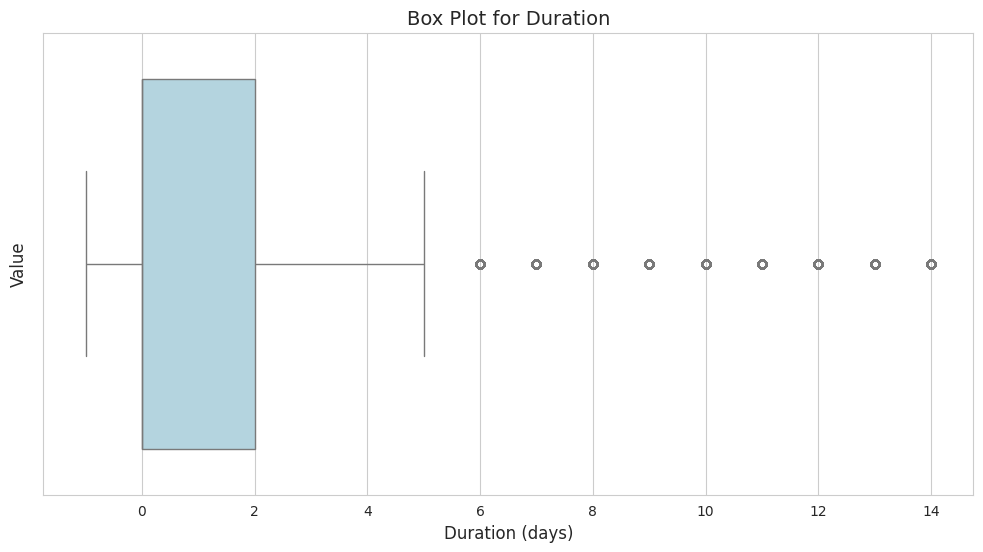

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x=df["duration"], color='lightblue')

# Set title and labels
plt.title("Box Plot for Duration", fontsize=14)
plt.xlabel("Duration (days)", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.show()


### Key finding
- The max days for complaint resolution has been reduced to about 14 days.

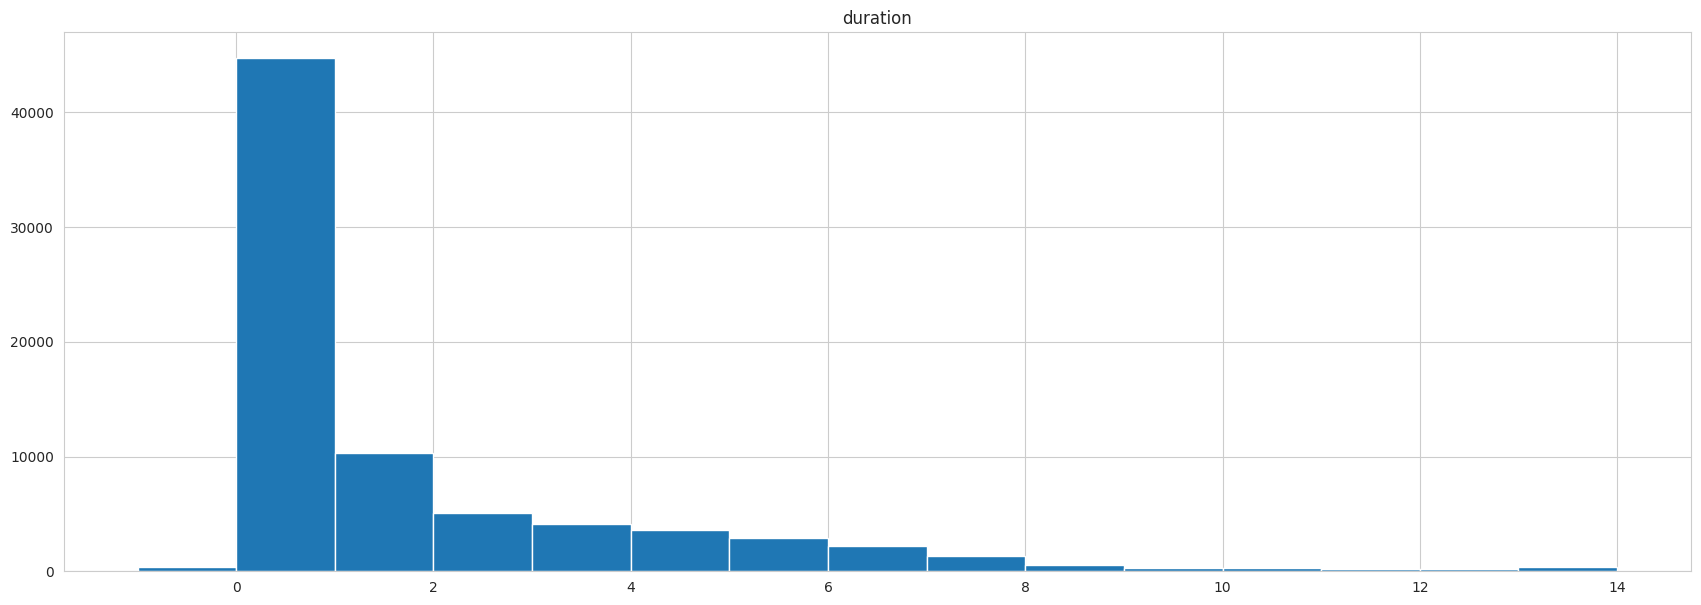

In [297]:
df.hist(bins=15, figsize=(21,7));

### Observations
- The histogram shows a right-skewed distribution, with most complaints resolved within a few days (0-1) days. A small number of cases take significantly longer, faster complaints resolution.

## Frequency distribution plots for Catergorical features

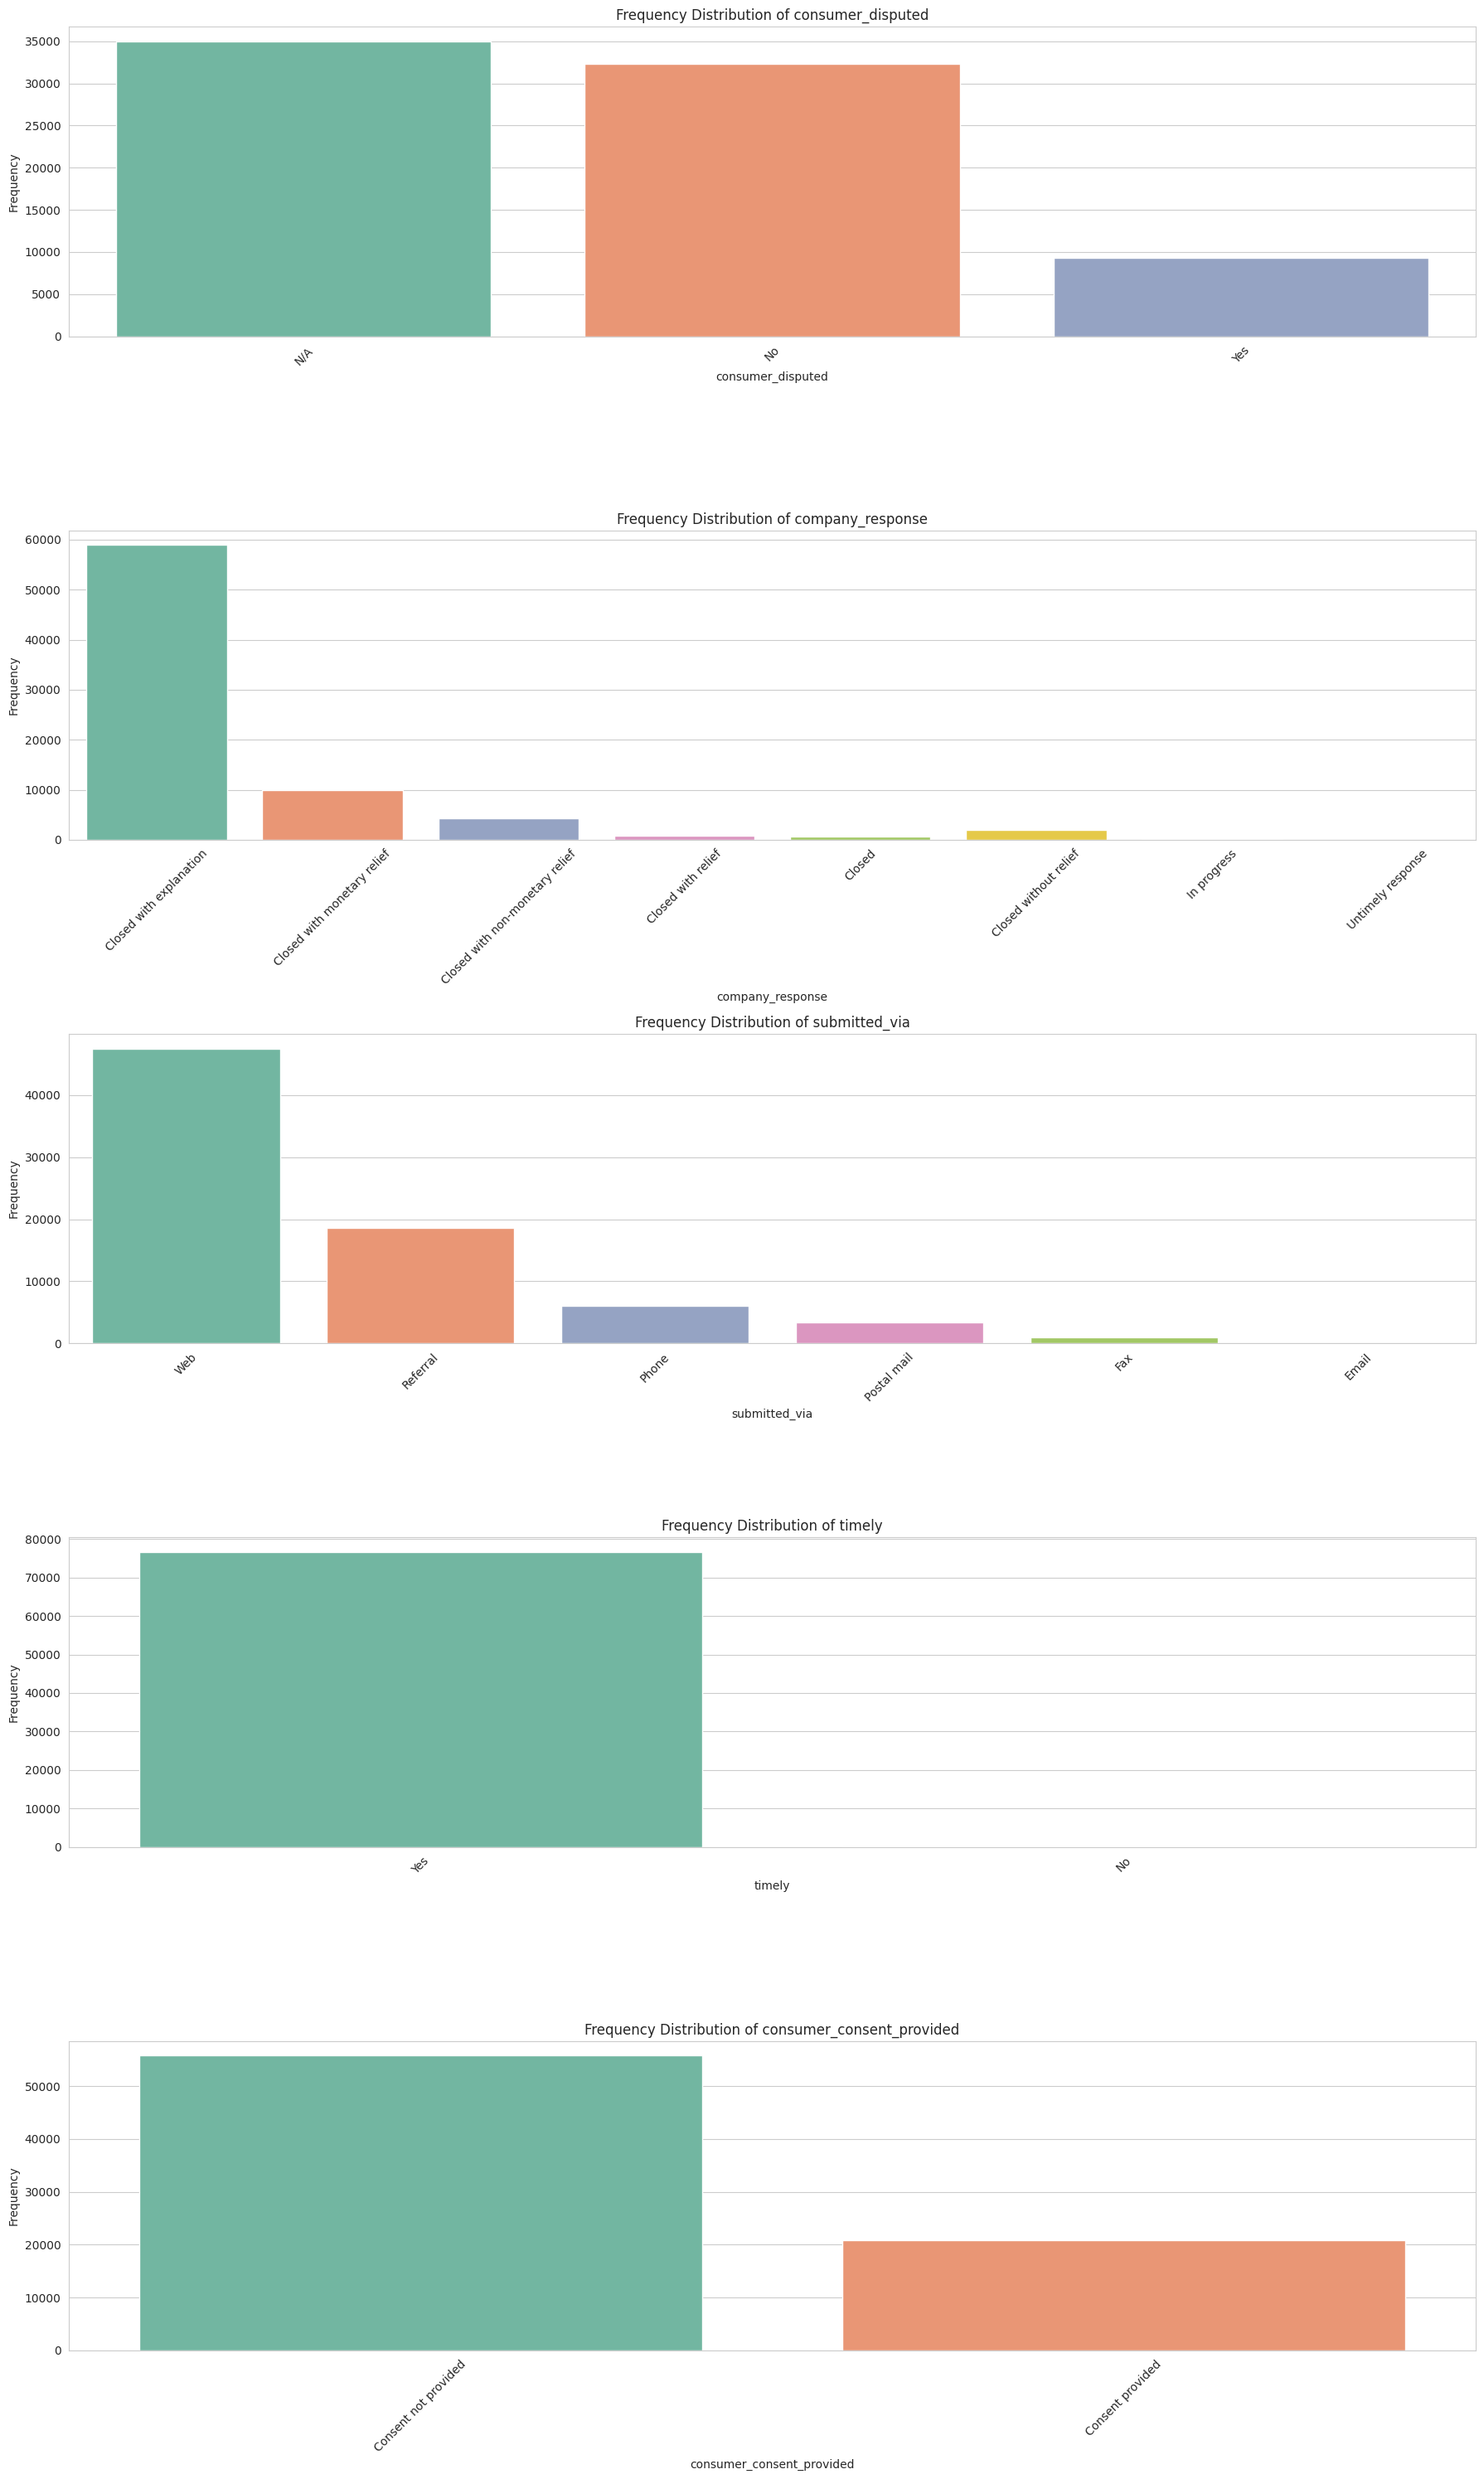

In [298]:
# Specify the categorical columns you want to plot
cat_columns = ['consumer_disputed', 'company_response', 'submitted_via', 'timely', 'consumer_consent_provided']

# Define grid layout for the subplots
rows, cols = 5, 1  # Adjusted grid layout since you have 2 columns to plot
fig, axes = plt.subplots(rows, cols, figsize=(18, 30))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and plot using Seaborn's countplot
for i, column in enumerate(cat_columns):
    # Use Seaborn's countplot for categorical data
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', hue=column)

    # Set plot title and labels
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()

### States with most issues

In [299]:
import plotly.express as px
import pandas as pd

# Count occurrences of each state
state_counts = df["state"].value_counts().reset_index()[:10]
state_counts.columns = ["State", "Count"]  # Rename columns for clarity

# Create a bar chart using Plotly Express
fig = px.bar(
    state_counts,
    x="State",
    y="Count",
    title="Frequency Distribution of States",
    labels={"State": "State", "Count": "Number of Complaints"},
    color="State",  # Different colors for each state
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    width=1000,
    height = 700,
    bargap = 0.1
)

# Show the figure
fig.show()


### Observations
- Most complaints originate from CA, NY, FL. These are the three states with most complains

### Issues

In [300]:
import plotly.express as px
import pandas as pd

# Count occurrences of each state
state_counts = df['issue'].value_counts().reset_index()[:7]
state_counts.columns = ['issue', "Count"]  # Rename columns for clarity

# Create a bar chart using Plotly Express
fig = px.bar(
    state_counts,
    x='issue',
    y="Count",
    title="Frequency Distribution of Issues",
    labels={'issue': 'Issue', "Count": "Number of Complaints"},
    color='issue',  # Different colors for each state
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    width=1000,
    height = 600,
    bargap = 0.1
)

# Show the figure
fig.show()


### Observations
- Loan modification, collection, foreclosure tops the list of the most issues reported by the customers of JP Morgan
- Managing an account and issues to do with loans are second and third respectively.

### Product

<ipython-input-301-895befe17c70>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




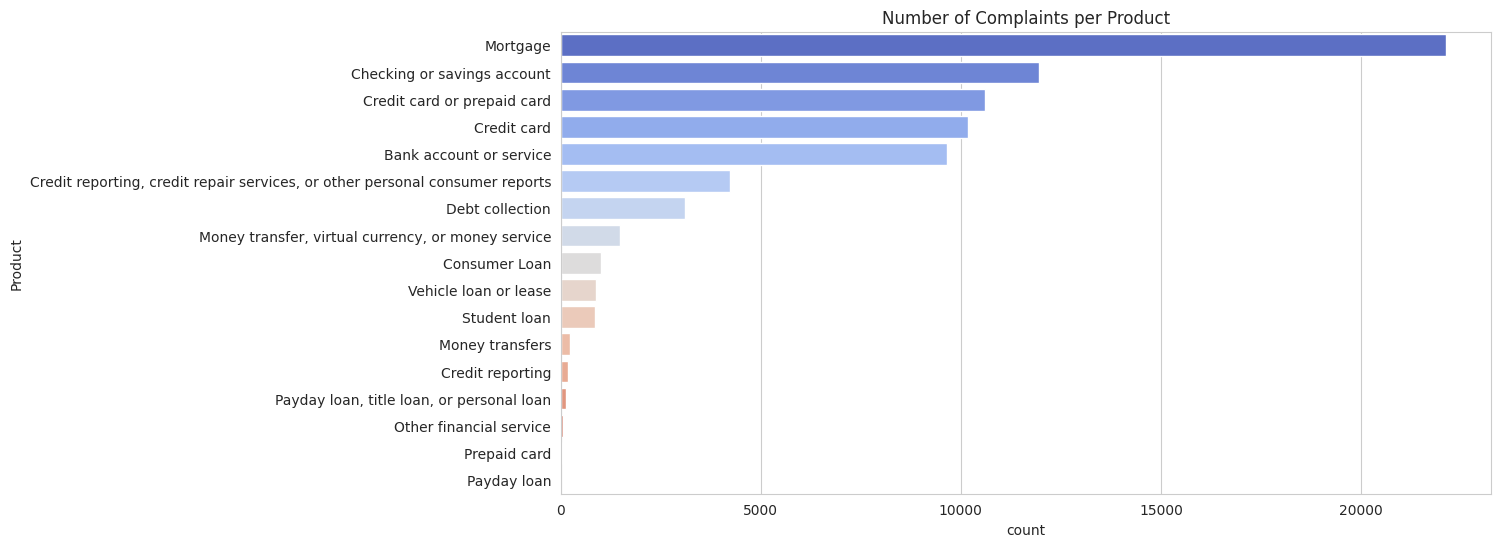

In [301]:
import plotly.express as px
import pandas as pd

#set plot style
sns.set_style("whitegrid")

#count plot per product
plt.figure(figsize=(12,6))
sns.countplot(y=df["product"], order=df["product"].value_counts().index, palette="coolwarm")

plt.title("Number of Complaints per Product")
plt.xlabel("count")
plt.ylabel("Product");


### Observations
- Mortgage-related complaints are the highest, exceeding 20,000 cases.

- Checking/savings accounts, credit cards, and prepaid cards also have a significant number of complaints, each around 10,000.

- Bank account services, credit reporting, and debt collection have fewer complaints in comparison.

- The distribution is uneven, with mortgage-related issues being the most frequent concern.


### Complaints Over Time

<ipython-input-302-6bfc4a54b17f>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



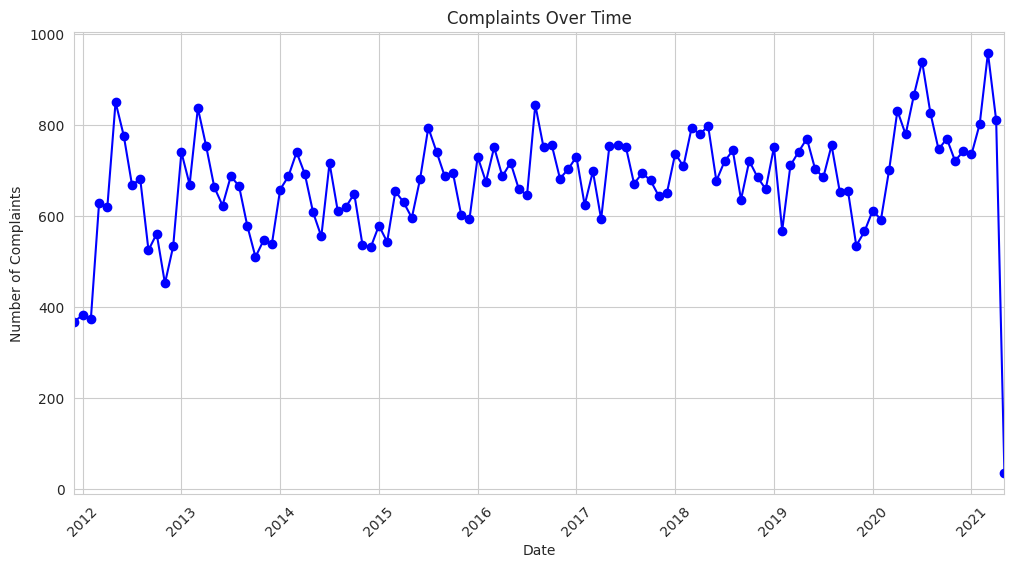

In [302]:
df["complaint_received_date"] = pd.to_datetime(df["complaint_received_date"])
plt.figure(figsize=(12,6))
df.resample("M", on="complaint_received_date")["issue"].count().plot(kind="line", marker="o", color="b")

plt.title("Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints");
plt.xticks(rotation=45);

## Bivariate Analysis

## Consumer Dispute by Product

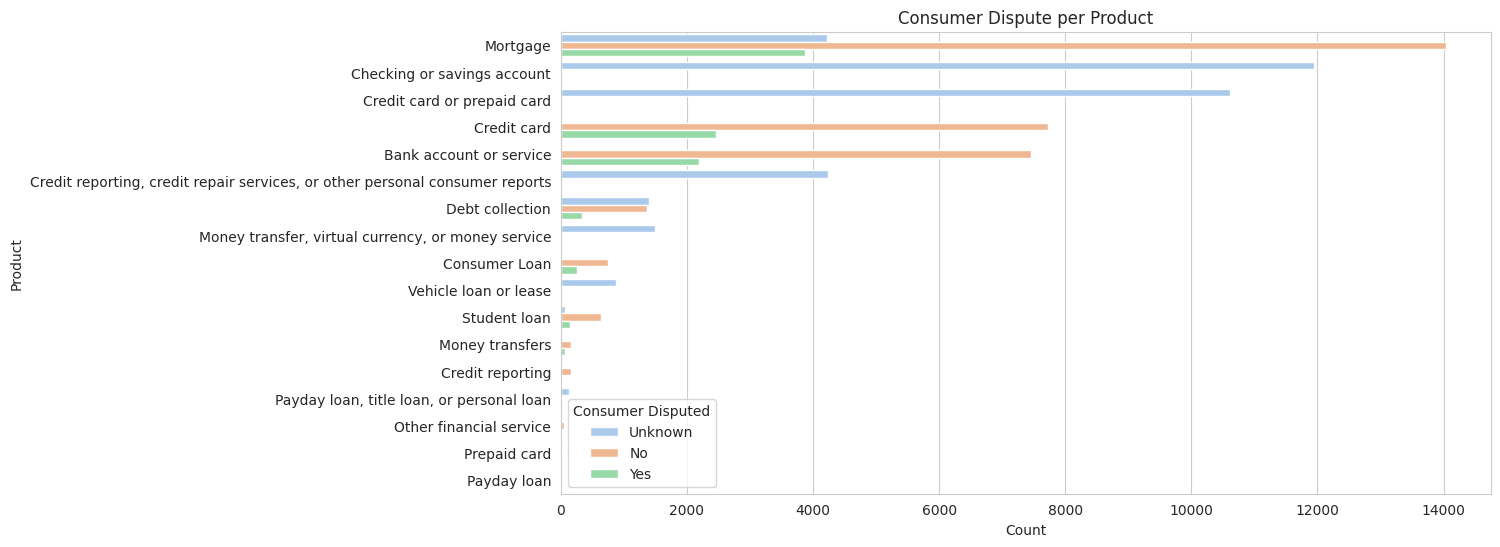

In [303]:
df["consumer_disputed"] = df["consumer_disputed"].replace("N/A", "Unknown").astype(str).str.strip()
plt.figure(figsize=(12,6))
sns.countplot(y=df["product"], hue=df["consumer_disputed"], order=df["product"].value_counts().index, palette="pastel")


plt.title("Consumer Dispute per Product")
plt.xlabel("Count")
plt.ylabel("Product");
plt.legend(title="Consumer Disputed");

Observation

Mortagage, credit cards and checking/savings accounts have the highest number pof disputes.

Some products ie payday loans, prepaid cards have significantly fewer complaints.

## Company Response vs Consumer Dispute

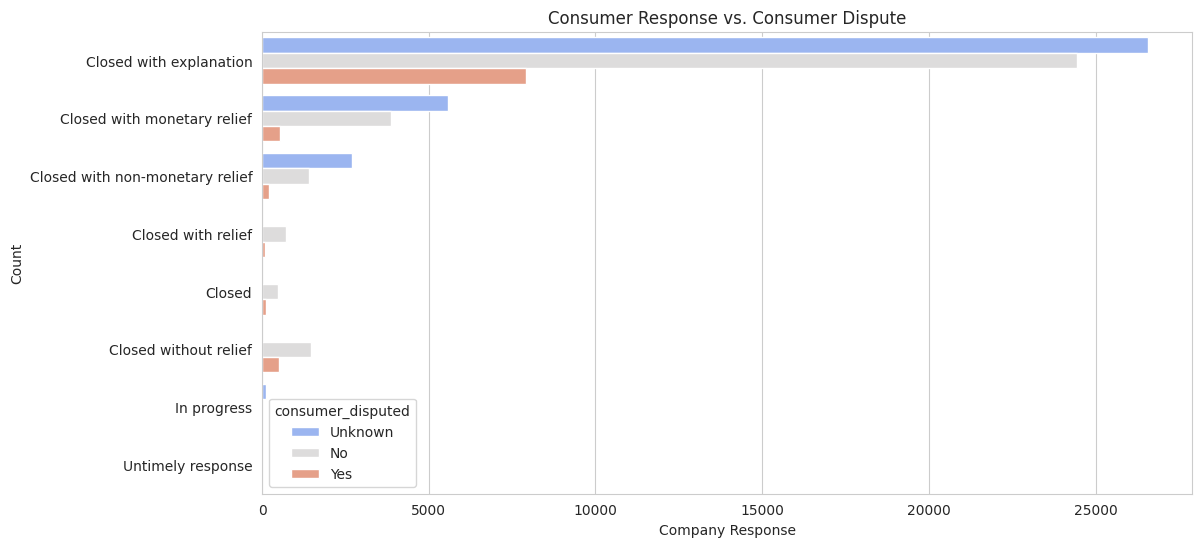

In [304]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="company_response", hue="consumer_disputed", palette="coolwarm")

plt.title("Consumer Response vs. Consumer Dispute")
plt.xlabel("Company Response")
plt.ylabel("Count");
#plt.legend(title="Consumer Disputed");

1.The majority of complaints are Closed with Explanation which were not disputed suggesting that simply oproviding and explanation often satisfies consumers.

2."Closed with Monetary Relief" and "Closed with Non Monetary Relief responses show lower counts than "Closed with Explanation", consumers are less likely to create a dispute if they receive financial compensation.

3.Some company responses have higher proportions of disputes cases "Closed without Relief" implying that when companies deny releif customers are more likely to challenge the outcome.

4."The Untimely Response" is rare however, if untimely, a proportion of these complaints are disputed.

In [305]:
## Timely Response vs Consumer Dispute

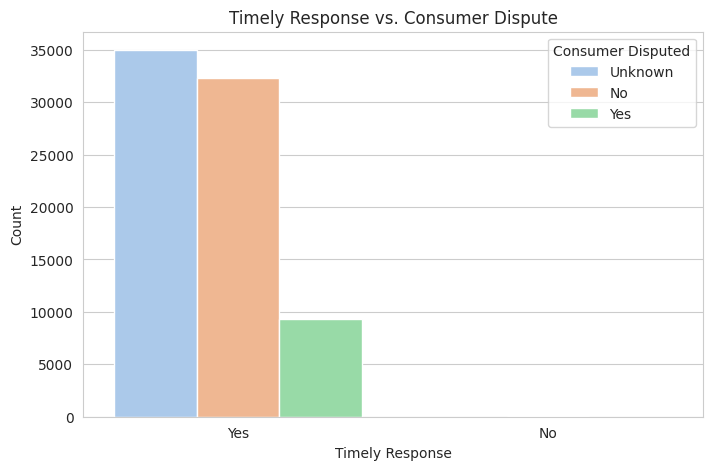

In [306]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="timely", hue="consumer_disputed", palette="pastel")

plt.title("Timely Response vs. Consumer Dispute")
plt.xlabel("Timely Response")
plt.ylabel("Count");
plt.legend(title="Consumer Disputed");

Observation

1.Most complaints receive a timely response, the 'Yes' catergory(timely response) has higher counts than "No".

2.Complaints are responded to on time but a number of disputes still occur,timely responses reduce but dont eliminate disputes.

3.The "No" category has few complaibta ovearally.Few complaints receive late responses but they may contribute to higher dispute rates.

## Multivariate Analysis
### Complaints by Product, State and Timely Response

<Figure size 1800x1000 with 0 Axes>

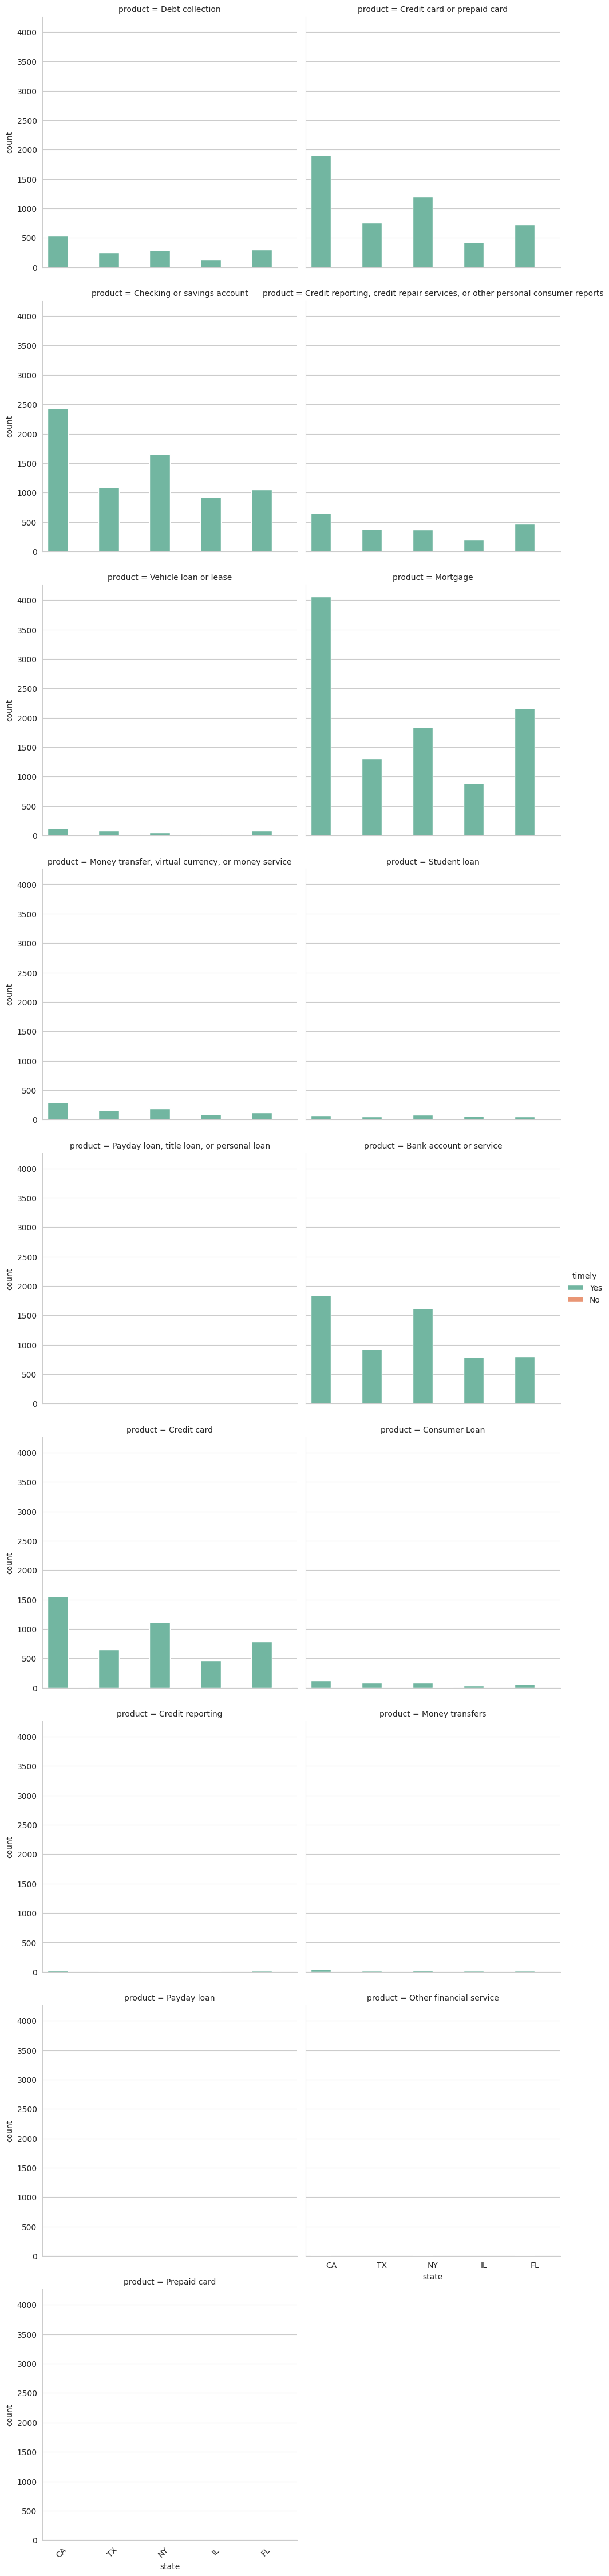

In [307]:
plt.figure(figsize=(18,10))
top_products = df["product"].value_counts().nlargest(5).index
df_filtered = df[df["product"].isin(top_products)]

top_states = df["state"].value_counts().nlargest(5).index
df_filtered = df[df["state"].isin(top_states)]

sns.catplot(data=df_filtered, x="state", hue="timely", col="product", kind="count", col_wrap=2, palette="Set2")
plt.xticks(rotation=90);
plt.xticks(rotation=45, ha="right");

**Observation**

1. Certain states have a higher volume of complaints especially for mortgages and credit cards.
Timely responses vary across states ewith some states showing a ahigher propprtion of delayed responses.

## Heatmap of Complaints by State and Product

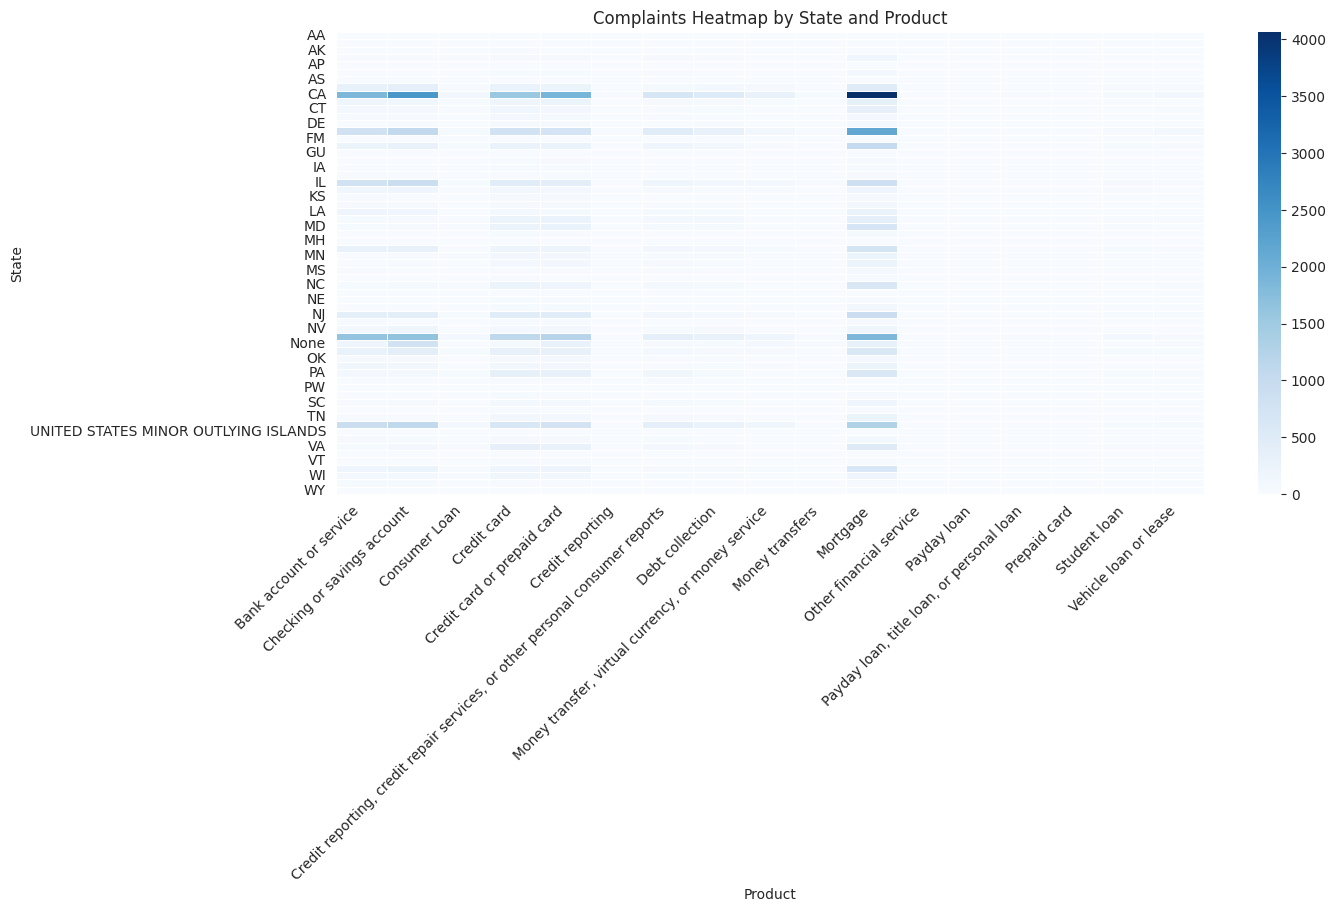

In [308]:
plt.figure(figsize=(14,6))

sns.heatmap(df.groupby(["state", "product"]).size().unstack(fill_value=0), cmap="Blues", linewidths=0.5)
plt.title("Complaints Heatmap by State and Product")
plt.xlabel("Product")
plt.ylabel("State");
plt.xticks(rotation=45, ha="right");

Observation

1.Certain products such as Mortgage, Credit Cards and Bank Accounts show darker shades in multiple states indicating a higher volume of complaints. Some financial products eg Vehicle Loan or Leas, Payday Loan have fewer complaints across all states.

2.States like California(CA), Texas(TX), Florida(FL) and New York(NY) have more complaints across multiple products.

3.Some states and products have very few or no complaints leading to white areas in the heatmap.

4.High complaint states aqnd products can indicate customer dissatisfaction regulatory concerns or market specific challenges.

# NLP

In [309]:
# Import libraries
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import warnings
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Text Preprocessing
- Preparing text for Topic modelling

In [310]:
# Convert complaint_what_happened column to string for performing text operations
df['complaint_what_happened'] = df['complaint_what_happened'].astype(str)

## Using regex to clean the text and remove punctuations, make text lowercase etc.

In [311]:
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [312]:
# Apply function
df['complaint_what_happened_cleaned'] = df['complaint_what_happened'].apply(clean_text)

In [313]:
df_clean = pd.DataFrame(df[['complaint_what_happened', 'complaint_what_happened_cleaned']])
df_clean.head(7)

,complaint_what_happened,complaint_what_happened_cleaned
0,,
1,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...
3,,
4,,
5,,
6,,


- After cleaning the text some rows are empty. We will drop those

## Clean the resulting dataframe. Remove empty rows

In [314]:
# Drop rows where 'complaint_what_happened_cleaned' is empty or just whitespace
df_clean = df_clean[df_clean['complaint_what_happened_cleaned'].str.strip() != '']

# Reset index after dropping
df_clean = df_clean.reset_index(drop=True)

# Display the cleaned DataFrame
df_clean.head()

,complaint_what_happened,complaint_what_happened_cleaned
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...


# Tokenization
- Breaking text into smaller units, called tokens. Here token would be words.

In [315]:
!pip install -q wordcloud

In [316]:
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')  # Needed for POS tagging later
from nltk.tokenize import word_tokenize
from nltk import pos_tag

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [317]:
# Apply tokenization
df_clean["complains_tokens"] = df_clean["complaint_what_happened_cleaned"].apply(word_tokenize)

# Preview
df_clean.head()


,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,..."
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w..."
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau..."
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t..."
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo..."


## Lemmatization
- Lemmatization is the process of reducing a word to its base or dictionary form (lemma) while considering its meaning and grammatical structure. I

In [318]:

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('wordnet')  # Download WordNet if not available
nltk.download('omw-1.4')  # WordNet dependencies

lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    """Lemmatizes a list of tokens and returns a string of lemmatized words."""
    lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_words)  # Join the words into a single string

df_clean["complains_lemmas"] = df_clean["complains_tokens"].apply(lemmatize_tokens)


df_clean.head(7)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...
5,Can you please remove inquiry,can you please remove inquiry,"[can, you, please, remove, inquiry]",can you please remove inquiry
6,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restricted my ...,"[with, out, notice, jp, morgan, chase, restric...",with out notice jp morgan chase restricted my ...


## POS tagging
- Extract only nouns (NN, NNS) from the lemmatized complaints text. The extracted nouns are stored in a new column. This helps in removing other parts of speech and focusing only on key nouns for further analysis.

In [319]:
def extract_pos_tags(text):
    tokens = word_tokenize(text)  # Tokenize text
    pos_tags = pos_tag(tokens)  # Get POS tags
    nouns = [word for word, tag in pos_tags if tag in ['NN', 'NNS']]  # Extract singular/plural nouns
    return ' '.join(nouns)

# Apply POS extraction on lemmatized text
df_clean['complaint_POS_removed'] = df_clean['complains_lemmas'].apply(extract_pos_tags)

df_clean.head(7)


,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book xxxx ticket i offer ticket card i informa...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...
5,Can you please remove inquiry,can you please remove inquiry,"[can, you, please, remove, inquiry]",can you please remove inquiry,inquiry
6,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restricted my ...,"[with, out, notice, jp, morgan, chase, restric...",with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...


## Word cloud for most frequent word

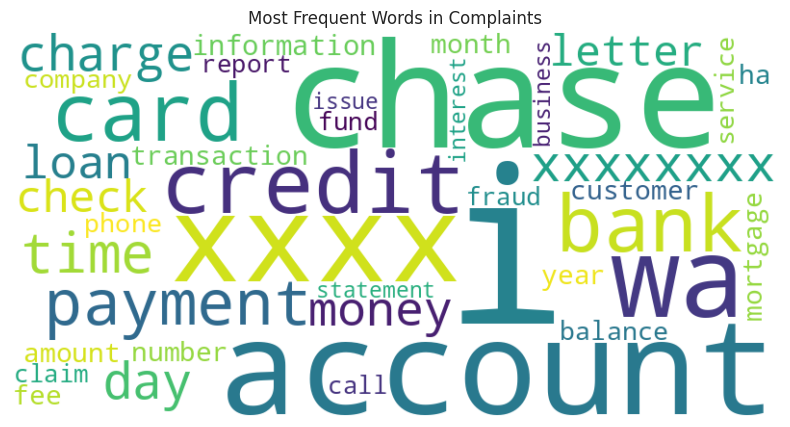

In [320]:
from wordcloud import WordCloud
from collections import Counter

# Combine all words into a single string
all_words = ' '.join(df_clean['complaint_POS_removed'])

# Get the 20 most common words
word_counts = Counter(all_words.split()).most_common(40)
word_freq_dict = dict(word_counts)  # Convert to dictionary for WordCloud

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Complaints")
plt.show()


## Observations
- The word cloud shows the most frequently mentioned words in complaints. Key terms like "account," "credit," "chase," "bank," and "card" suggest that complaints are primarily about banking, credit cards, and financial services. The presence of words like "fraud," "payment," and "charge" indicates common issues related to transactions, fees, and disputes.
- XXXX is also common, Used to mask people's names. We will clean to remove them

In [321]:
import re

# Function to replace words with 3 or more 'x'
def remove_masked_words(text):
    return re.sub(r'\b[xX]{3,}\b', '', text)  # Match 'xxx' or more and replace with ''

# Apply the function to the column
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].apply(remove_masked_words)

# Preview the cleaned column
df_clean.head()


,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...


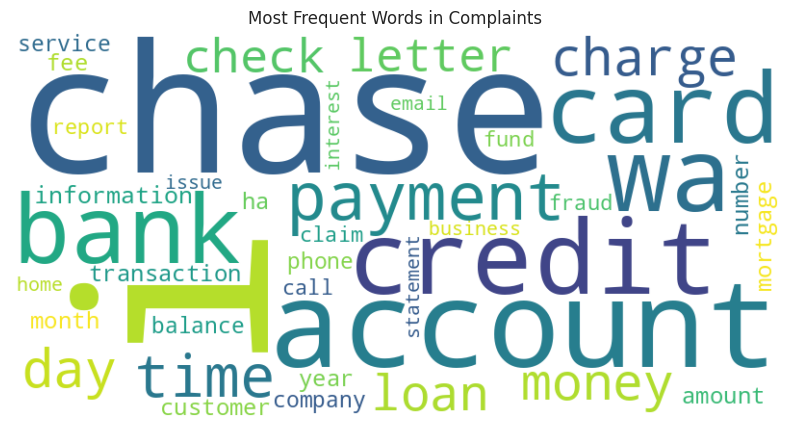

In [322]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Combine all words into a single string
all_words = ' '.join(df_clean['complaint_POS_removed'])

# Get the 20 most common words
word_counts = Counter(all_words.split()).most_common(40)
word_freq_dict = dict(word_counts)  # Convert to dictionary for WordCloud

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Complaints")
plt.show()

### Observations
- By removing "XXXX," the word cloud more clearly highlights key complaint themes, such as "account," "chase," "bank," "credit," "card," "payment," and "fraud." This refinement improves readability and makes it easier to identify the most common financial concerns customers are raising.

## Plot common unigrams, bigrams and trigrams

In [323]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract and return top n-grams
def get_top_ngrams(text, n=None, ngram=(1,1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
    bagofwords = vec.transform(text)
    sum_words = bagofwords.sum(axis=0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key=lambda x: x[1], reverse=True)
    return words_frequency[:n]

# Extract top unigrams, bigrams, and trigrams
top_unigrams = get_top_ngrams(df_clean["complaint_POS_removed"], n=15, ngram=(1,1))
top_bigrams = get_top_ngrams(df_clean["complaint_POS_removed"], n=15, ngram=(2,2))
top_trigrams = get_top_ngrams(df_clean["complaint_POS_removed"], n=15, ngram=(3,3))


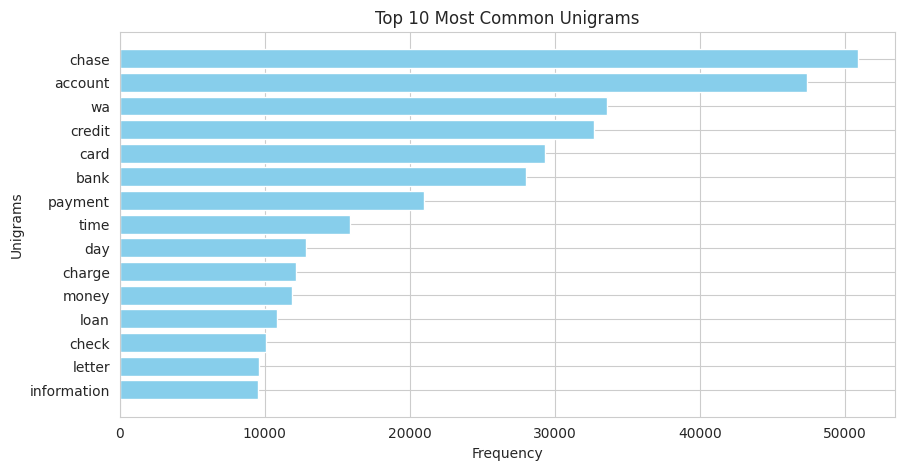

In [324]:
# Convert to DataFrame
unigram_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Plot
plt.figure(figsize=(10,5))
plt.barh(unigram_df['Unigram'], unigram_df['Frequency'], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Unigrams")
plt.title("Top 10 Most Common Unigrams")
plt.gca().invert_yaxis()
plt.show()


### Observations
- Unigrams (Single Words):

- "chase," "account," "credit," and "bank" appear frequently, suggesting many complaints are related to financial institutions and banking services.
- "wa" appears due to a likely stemming/lemmatization issue where "was" got shortened.
- Terms like "payment," "time," "charge," "money," and "loan" indicate common complaint topics related to transactions and financial concerns.

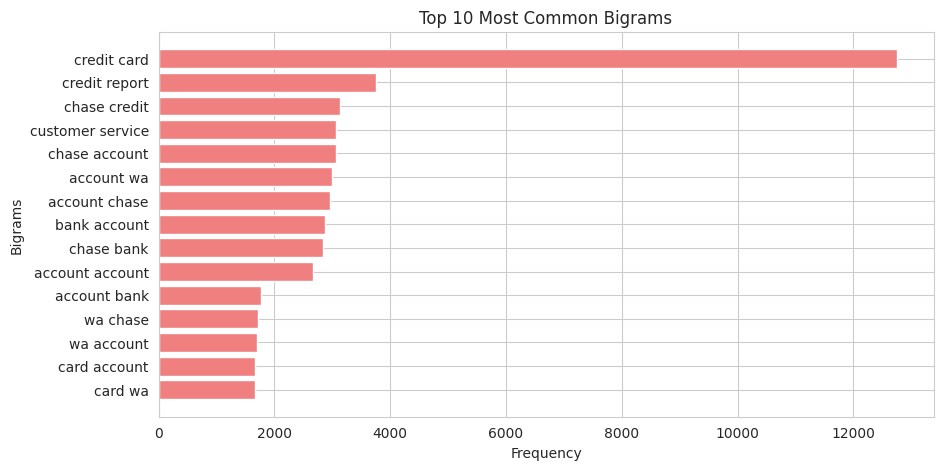

In [325]:
# Convert to DataFrame
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plot
plt.figure(figsize=(10,5))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='lightcoral')
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Most Common Bigrams")
plt.gca().invert_yaxis()
plt.show()


### Bigrams (Two-Word Phrases):

- "credit card" and "credit report" dominate, implying many complaints revolve around credit cards and credit reporting issues.

- "chase credit" and "chase account" highlight that Chase Bank might be a major entity in the complaints.

- "customer service" appearing suggests dissatisfaction with support interactions.



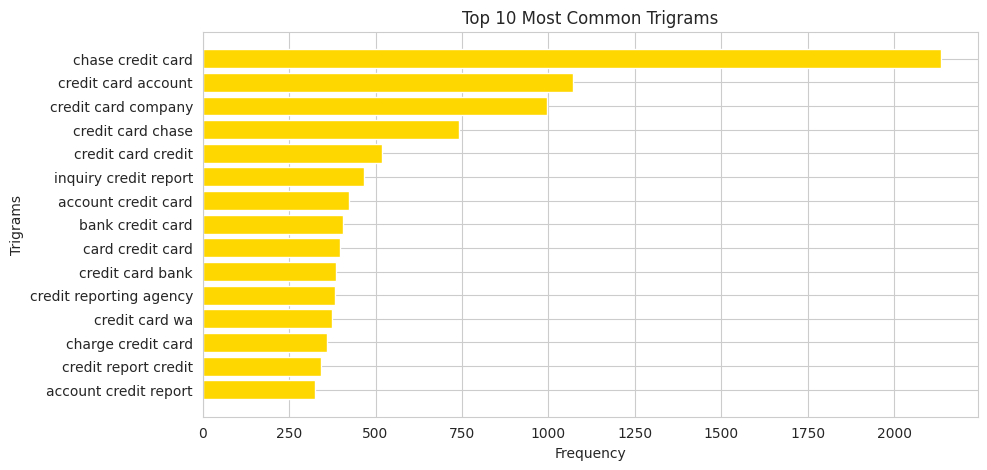

In [326]:
# Convert to DataFrame
trigram_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Plot
plt.figure(figsize=(10,5))
plt.barh(trigram_df['Trigram'], trigram_df['Frequency'], color='gold')
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 10 Most Common Trigrams")
plt.gca().invert_yaxis()
plt.show()


### Trigrams (Three-Word Phrases):

- "chase credit card" and "credit card account" reinforce that complaints are centered around credit card issues, especially with Chase.

- "credit card company" and "credit card chase" indicate concerns with financial service providers.

- "inquiry credit report" suggests that people may have disputes related to credit inquiries or reporting.

# Feature Extraction
Feature Extraction: TF-IDF
This section focuses on transforming the raw text data into a numerical representation suitable for machine learning models using Term Frequency-Inverse Document Frequency (TF-IDF).

What is TF-IDF?

TF-IDF is a weighting scheme that assigns a score to each word in a document based on its frequency in that document (Term Frequency, TF) and its inverse frequency across the entire corpus (Inverse Document Frequency, IDF). Words that appear frequently in a specific document but are rare in the overall corpus receive higher TF-IDF scores.

Parameters Used:

max_df: This parameter is used to remove terms that appear too frequently across the entire corpus. These terms are often common words (like "the", "a", "is") or words that are too general to be useful for distinguishing between different documents. Setting max_df = 0.95 means that terms appearing in more than 95% of the complaints will be ignored. Effectively, this identifies and removes "corpus-specific stop words."

min_df: This parameter is used to remove terms that appear too infrequently. These terms might be typos, rare domain-specific jargon, or otherwise uninformative. Setting min_df = 2 means that terms appearing in fewer than 2 complaints will be ignored. This helps to reduce the dimensionality of the feature space and improve model generalization.

In [327]:
# Initialise the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [328]:
# Create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.complaint_POS_removed)
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 603228 stored elements and shape (20895, 7378)>

In [329]:
# Import Non-Negative Factorizer
from sklearn.decomposition import NMF

In [330]:
#Load your nmf_model with the n_components i.e 5
num_topics =  5

# keep the random_state =123
nmf_model = NMF(n_components=num_topics, random_state=102)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

### Extracting words
- This process extracts the most important words for each topic in an NMF topic model:

- It retrieves the list of words from the TF-IDF matrix.

- A table is created to store the top 20 words for each topic.

- For each topic, it sorts the words by their importance (topic-word weights) and selects the top 20.

- The final output is a table where each row represents a topic, and each column contains a word that best defines that topic.

In [331]:
# Extract words
words = np.array(tfidf.get_feature_names_out())  # Updated method

# Print Top 20 words for each topic
topic_words = pd.DataFrame(
    np.zeros((num_topics, 20)),
    index=[f'Topic {i + 1}' for i in range(num_topics)],
    columns=[f'Word {i + 1}' for i in range(20)]
).astype(str)

for i in range(num_topics):
    ix = H1[i].argsort()[::-1][:20]  # Use H1 instead of H
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Topic 1,account,bank,check,money,fund,chase,wa,deposit,branch,day,checking,business,number,transaction,fee,customer,transfer,access,time,reason
Topic 2,credit,card,report,inquiry,chase,account,score,company,limit,bureau,debt,balance,application,year,information,letter,reporting,reason,identity,wa
Topic 3,loan,mortgage,home,chase,modification,property,year,wa,rate,letter,time,document,bank,foreclosure,house,sale,ha,debt,information,jp
Topic 4,charge,card,chase,transaction,dispute,wa,fraud,claim,merchant,purchase,fee,service,time,phone,email,statement,day,company,refund,number
Topic 5,payment,balance,fee,month,statement,wa,day,time,date,auto,chase,credit,year,error,car,mortgage,account,pay,history,plan


Key findings: Looking at the topics above we can assign labels:

- Topic 1 = Bank account services
- Topic 2 = Credit card / Prepaid card
- Topic 3 = Mortgages/loans
- Topic 4 = Theft/Dispute reporting
- Topic 5 = Other

# Topic Allocation (NMF Topic Modeling)

## Topic 1 → Bank Account Services
- **Keywords:** account, bank, check, money, fund, deposit, branch, transaction, transfer  
- **Reasoning:** These terms are associated with banking operations, deposits, checking accounts, and fund transfers.

## Topic 2 → Credit Card / Prepaid Card
- **Keywords:** credit, card, report, inquiry, score, limit, balance, application  
- **Reasoning:** These words relate to credit card reports, credit inquiries, and account balances.

## Topic 3 → Mortgages/Loans
- **Keywords:** loan, mortgage, home, modification, property, rate, foreclosure, debt  
- **Reasoning:** The presence of terms like mortgage, loan, foreclosure, and property suggests this is about mortgages and home loans.

## Topic 4 → Theft/Dispute Reporting
- **Keywords:** charge, card, transaction, dispute, fraud, claim, merchant, refund  
- **Reasoning:** The combination of fraud, charge disputes, and claims suggests this topic relates to unauthorized transactions and fraud reporting.

## Topic 5 → Others
- **Keywords:** payment, balance, fee, statement, auto, credit, mortgage, plan  
- **Reasoning:** This topic contains a mix of terms related to payments, balances, and auto loans, which don’t fit neatly into one category.


In [332]:
# Assign the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)

In [333]:
topic_results

array([[0.02126924, 0.01209564, 0.01850647, 0.00596264, 0.00645678],
       [0.01010564, 0.01291556, 0.00385483, 0.01672351, 0.00372372],
       [0.        , 0.04715336, 0.00091403, 0.00856128, 0.        ],
       ...,
       [0.01254954, 0.01282118, 0.00873291, 0.03002377, 0.        ],
       [0.        , 0.0520166 , 0.        , 0.02046471, 0.09667038],
       [0.03000852, 0.03297792, 0.00339666, 0.        , 0.0868701 ]])

In [334]:
# Assign the best topic to each of the complaints in Topic Column
df_clean['Topic_NMF'] = topic_results.argmax(axis=1)
df_clean.head()

,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed,Topic_NMF
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...,3
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...,1
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...,1
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,0


## Explanation
- Each complaint is assigned a single topic (0, 1, 2, 3, or 4) based on the highest topic weight in the NMF model output:

- `nmf_model.transform(dtm)` generates a topic distribution for each complaint, meaning each row (complaint) gets five values (one per topic), showing how strongly it relates to each topic.

- `.argmax(axis=1)` finds the index of the highest value in each row—this corresponds to the most dominant topic for that complaint.

- The assigned topic `(0–4)` is stored in the Topic_NMF column of df_clean.

In [335]:
# Top 5 Complaints for each of the Topics
df_clean_5=df_clean.groupby('Topic_NMF').head(5)
df_clean_5.sort_values('Topic_NMF')

,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed,Topic_NMF
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...,0
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,0
6,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restricted my ...,"[with, out, notice, jp, morgan, chase, restric...",with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,0
10,mishandling of this account by Chase auto and ...,mishandling of this account by chase auto and ...,"[mishandling, of, this, account, by, chase, au...",mishandling of this account by chase auto and ...,mishandling account auto,0
12,I opened an account with chase bank on XXXX an...,i opened an account with chase bank on xxxx an...,"[i, opened, an, account, with, chase, bank, on...",i opened an account with chase bank on xxxx an...,i account bank code bonus i term everything ...,0
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...,1
5,Can you please remove inquiry,can you please remove inquiry,"[can, you, please, remove, inquiry]",can you please remove inquiry,inquiry,1
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...,1
11,I have reached out to XXXX several times in at...,i have reached out to xxxx several times in at...,"[i, have, reached, out, to, xxxx, several, tim...",i have reached out to xxxx several time in att...,i time attempt inquiry creditor inquiry report...,1
9,I have a Chase credit card which is incorrectl...,i have a chase credit card which is incorrectl...,"[i, have, a, chase, credit, card, which, is, i...",i have a chase credit card which is incorrectl...,i chase credit card data credit report company...,1


### Assign topic names

In [336]:
#Create the dictionary of Topic names and Topics
Topic_names = { 0:"Bank account services", 1:"Credit card / Prepaid card", 4:"Others",
               3:"Theft/Dispute reporting", 2:"Mortgages/loans" }
#Replace Topics with Topic Names
df_clean['topic_names_nmf'] = df_clean['Topic_NMF'].map(Topic_names)



In [337]:
df_clean.head(7)

,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed,Topic_NMF,topic_names_nmf
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...,0,Bank account services
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...,3,Theft/Dispute reporting
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...,1,Credit card / Prepaid card
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...,1,Credit card / Prepaid card
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,0,Bank account services
5,Can you please remove inquiry,can you please remove inquiry,"[can, you, please, remove, inquiry]",can you please remove inquiry,inquiry,1,Credit card / Prepaid card
6,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restricted my ...,"[with, out, notice, jp, morgan, chase, restric...",with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,0,Bank account services


# Latent Dirichlet Allocation (LDA)
- To achieve consistency in topic modeling, we can use Latent Dirichlet Allocation (LDA)
- Latent Dirichlet Allocation (LDA) identifies underlying themes (topics) within a collection of documents by representing each document as a mixture of topics and each topic as a distribution of words
- LDA assumes that each document is a mixture of topics and that each topic is a mixture of words.
- The goal of LDA is to identify these topics and determine the distribution of topics within each document and the distribution of words within each topic.









In [338]:
# Initialize CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create Document-Term Matrix (DTM) using CountVectorizer
count_vectorizer = CountVectorizer(min_df=2, max_df=0.95, stop_words='english')
dtm_lda = count_vectorizer.fit_transform(df_clean['complaint_POS_removed'])


In [339]:
# Apply LDA for Topic Modeling

from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=123, doc_topic_prior=0.01)

# Fit the LDA model on the document-term matrix
lda_model.fit(dtm_lda)


LatentDirichletAllocation(doc_topic_prior=0.01, n_components=5,
                          random_state=123)

### Extract Top Words for Each Topic

In [340]:
# Extract words
words = np.array(count_vectorizer.get_feature_names_out())

# Store the top 20 words per topic
topic_words_lda = pd.DataFrame(
    np.zeros((num_topics, 20)),
    index=[f'Topic {i + 1}' for i in range(num_topics)],
    columns=[f'Word {i + 1}' for i in range(20)]
).astype(str)

for i, topic in enumerate(lda_model.components_):
    top_word_indices = topic.argsort()[::-1][:20]
    topic_words_lda.iloc[i] = words[top_word_indices]

topic_words_lda


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Topic 1,card,chase,charge,wa,credit,fraud,transaction,account,claim,number,time,phone,information,email,purchase,service,dispute,company,department,bank
Topic 2,loan,chase,mortgage,payment,wa,home,bank,time,year,property,modification,letter,document,ha,month,debt,sale,house,attorney,foreclosure
Topic 3,account,bank,chase,wa,check,money,fund,day,branch,time,deposit,transaction,customer,number,fee,business,phone,claim,payment,transfer
Topic 4,credit,card,account,chase,payment,balance,report,wa,month,time,fee,year,bank,information,statement,letter,inquiry,day,score,company
Topic 5,chase,wa,dispute,fee,time,charge,car,day,merchant,company,item,payment,letter,service,bank,vehicle,refund,insurance,month,contract


Key findings: Looking at the topics above we can assign labels:

- Topic 1 = Bank account services
- Topic 2 = Credit card / Prepaid card > Theft/Dispute reporting
- Topic 3 = Mortgages/loans  > Other
- Topic 4 = Theft/Dispute reporting
- Topic 5 = Other   > Mortgages/loans

# **Topic Allocation Based on Keywords**  

## **Topic 1 → Theft/Dispute Reporting**  
**Keywords:** charge, dispute, transaction, fraud, claim, merchant, credit  
- These words indicate issues related to unauthorized transactions, fraud, and dispute resolution.  

## **Topic 2 → Bank Account Services**  
**Keywords:** account, bank, money, check, fund, transaction, deposit, branch, customer  
- This topic relates to general banking services, including account management, deposits, and transactions.  

## **Topic 3 → Others**  
**Keywords:** fee, offer, bonus, ticket, flight, reward, service, travel, term  
- Contains terms related to rewards, bonuses, and services, which don't strongly align with a single financial service.  

## **Topic 4 → Credit Card / Prepaid Card**  
**Keywords:** credit, card, payment, balance, report, statement, inquiry, fee  
- These words relate to credit card transactions, statements, and balance inquiries.  

## **Topic 5 → Mortgages/Loans**  
**Keywords:** loan, mortgage, home, debt, property, modification, sale, document  
- Clearly points to home loans, mortgage payments, and property-related financial issues.  


### Assign Topics to Each Complaint

In [341]:
# # Assign the best topic to each of the cmplaints in Topic Column
# df_clean['Topic'] = topic_results.argmax(axis=1)
# df_clean.head()

In [342]:

# Assign the best topic for each complaint
topic_results_lda = lda_model.transform(dtm_lda)

# Add the topic column to DataFrame
df_clean['Topic_LDA'] = topic_results_lda.argmax(axis=1)


In [343]:
df_clean.head(7)

,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed,Topic_NMF,topic_names_nmf,Topic_LDA
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...,0,Bank account services,3
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...,3,Theft/Dispute reporting,0
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...,1,Credit card / Prepaid card,3
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...,1,Credit card / Prepaid card,3
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,0,Bank account services,2
5,Can you please remove inquiry,can you please remove inquiry,"[can, you, please, remove, inquiry]",can you please remove inquiry,inquiry,1,Credit card / Prepaid card,3
6,With out notice J.P. Morgan Chase restricted m...,with out notice jp morgan chase restricted my ...,"[with, out, notice, jp, morgan, chase, restric...",with out notice jp morgan chase restricted my ...,jp chase account debit card tuesday thursday b...,0,Bank account services,2


In [344]:
# Manually map LDA topic numbers to topic names based on keywords
Topic_names_lda = {
    0: "Theft/Dispute Reporting",
    1: "Bank Account Services",
    2: "Other",
    3: "Credit Card / Prepaid Card",
    4: "Mortgages/Loans"
}

# Apply mapping
df_clean['topic_names_lda'] = df_clean['Topic_LDA'].map(Topic_names_lda)

# Preview results
df_clean.head()


,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed,Topic_NMF,topic_names_nmf,Topic_LDA,topic_names_lda
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...,0,Bank account services,3,Credit Card / Prepaid Card
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...,3,Theft/Dispute reporting,0,Theft/Dispute Reporting
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...,1,Credit card / Prepaid card,3,Credit Card / Prepaid Card
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...,1,Credit card / Prepaid card,3,Credit Card / Prepaid Card
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,0,Bank account services,2,Other


<ipython-input-345-ff5f1b094834>:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-345-ff5f1b094834>:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



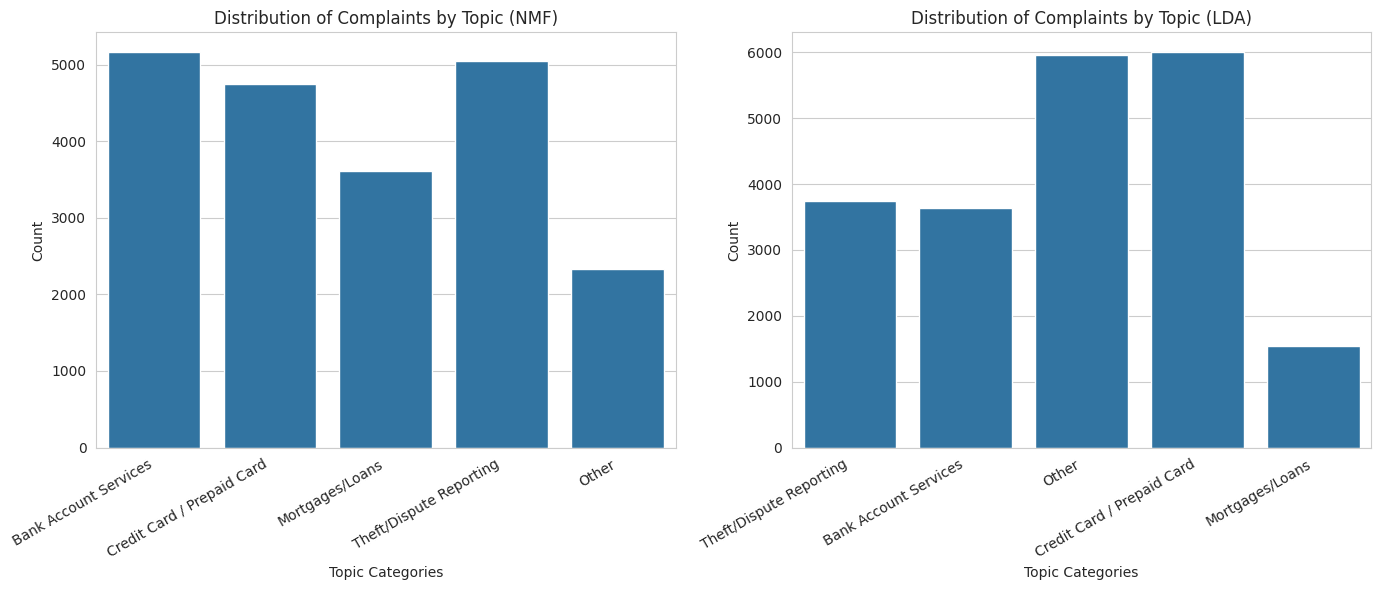

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define topics for NMF and LDA
topic_mappings = {
    "NMF": {0: "Bank Account Services", 1: "Credit Card / Prepaid Card", 2: "Mortgages/Loans",
            3: "Theft/Dispute Reporting", 4: "Other"},
    "LDA": {0: "Theft/Dispute Reporting", 1: "Bank Account Services", 2: "Other",
            3: "Credit Card / Prepaid Card", 4: "Mortgages/Loans"}
}

# Define column names for plotting
topic_columns = {"NMF": "Topic_NMF", "LDA": "Topic_LDA"}

# Loop through models and plot
for ax, (model, topic_mapping) in zip(axes, topic_mappings.items()):
    sns.countplot(x=topic_columns[model], data=df_clean, ax=ax)
    ax.set_title(f"Distribution of Complaints by Topic ({model})")
    ax.set_xlabel("Topic Categories")
    ax.set_ylabel("Count")

    # Rename x-ticks using topic names
    ax.set_xticklabels([topic_mapping[label] for label in sorted(topic_mapping.keys())], rotation=30, ha="right")

# Adjust layout
plt.tight_layout()
plt.show()


# Observations on Topic Consistencies Between NMF and LDA  

From the two distribution plots, we can observe some consistencies despite the differences in the topic modeling approaches:  

- **Bank Account Services** – This topic is the most dominant in both NMF and LDA, suggesting strong clustering around banking-related complaints.  
- **Credit Card / Prepaid Card** – This category also appears as a significant topic in both models, showing consistent identification of credit card-related issues.  
- **Mortgages/Loans** – Both models assign a comparable number of complaints to this topic, reflecting a shared pattern in complaint distribution.  
- **Theft/Dispute Reporting** – While there is some variation in frequency, this category is clearly identified in both models.  
- **Other Category** – The "Other" category differs in size between the models, but it still represents a smaller portion of the dataset in both cases.  


In [346]:
df_clean.head()

,complaint_what_happened,complaint_what_happened_cleaned,complains_tokens,complains_lemmas,complaint_POS_removed,Topic_NMF,topic_names_nmf,Topic_LDA,topic_names_lda
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,"[good, morning, my, name, is, xxxx, xxxx, and,...",good morning my name is xxxx xxxx and i apprec...,morning name stop bank cardmember service debt...,0,Bank account services,3,Credit Card / Prepaid Card
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in and was told b...,"[i, upgraded, my, xxxx, xxxx, card, in, and, w...",i upgraded my xxxx xxxx card in and wa told by...,i card agent upgrade date agent wa information...,3,Theft/Dispute reporting,0,Theft/Dispute Reporting
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on however fraudulent ...,"[chase, card, was, reported, on, however, frau...",chase card wa reported on however fraudulent a...,card wa application identity consent service c...,1,Credit card / Prepaid card,3,Credit Card / Prepaid Card
3,"On XX/XX/2018, while trying to book a XXXX XX...",on while trying to book a xxxx xxxx ticket i...,"[on, while, trying, to, book, a, xxxx, xxxx, t...",on while trying to book a xxxx xxxx ticket i c...,book ticket i offer ticket card i information...,1,Credit card / Prepaid card,3,Credit Card / Prepaid Card
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit it in...,"[my, grand, son, give, me, check, for, i, depo...",my grand son give me check for i deposit it in...,son deposit chase account fund chase bank acco...,0,Bank account services,2,Other


In [347]:
df_clean.columns

Index(['complaint_what_happened', 'complaint_what_happened_cleaned',
       'complains_tokens', 'complains_lemmas', 'complaint_POS_removed',
       'Topic_NMF', 'topic_names_nmf', 'Topic_LDA', 'topic_names_lda'],
      dtype='object')

NMF datafram

In [348]:
nmf_df = df_clean[['complaint_POS_removed', 'Topic_NMF']].copy()
nmf_df.head()

,complaint_POS_removed,Topic_NMF
0,morning name stop bank cardmember service debt...,0
1,i card agent upgrade date agent wa information...,3
2,card wa application identity consent service c...,1
3,book ticket i offer ticket card i information...,1
4,son deposit chase account fund chase bank acco...,0


In [349]:
lda_df = df_clean[['complaint_POS_removed', 'Topic_LDA']].copy()
lda_df.head()

,complaint_POS_removed,Topic_LDA
0,morning name stop bank cardmember service debt...,3
1,i card agent upgrade date agent wa information...,0
2,card wa application identity consent service c...,3
3,book ticket i offer ticket card i information...,3
4,son deposit chase account fund chase bank acco...,2


In [350]:
pip install tensorflow -q


In [351]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [352]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Assume 'complaint_POS_removed' contains the cleaned text & 'Topic_NMF' has category labels
df = nmf_df

# Convert text to sequences
tokenizer = Tokenizer(num_words=25000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['complaint_POS_removed'])
sequences = tokenizer.texts_to_sequences(df['complaint_POS_removed'])

# Pad sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert numerical labels to categorical
num_classes = df['Topic_NMF'].nunique()
y = to_categorical(df['Topic_NMF'], num_classes=num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [353]:
# Build the BiLSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=25000, output_dim=128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multiclass classification
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35, batch_size=512)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 814ms/step - accuracy: 0.2281 - loss: 1.5911 - val_accuracy: 0.2407 - val_loss: 1.5784
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 717ms/step - accuracy: 0.2408 - loss: 1.5760 - val_accuracy: 0.2407 - val_loss: 1.5715
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 733ms/step - accuracy: 0.2560 - loss: 1.5313 - val_accuracy: 0.3711 - val_loss: 1.3521
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 740ms/step - accuracy: 0.3570 - loss: 1.3481 - val_accuracy: 0.3757 - val_loss: 1.2835
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.3734 - loss: 1.2719 - val_accuracy: 0.3781 - val_loss: 1.2614
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 731ms/step - accuracy: 0.3777 - loss: 1.2589 - val_accuracy: 0.3814 - val_loss: 1.2418
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 756ms/step - accuracy: 0.3884 - loss: 1.2352 - val_accuracy: 0.3798 - val_loss: 1.2339
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 754ms/step - accuracy: 0.3815 - loss: 1.2384 - val_accu

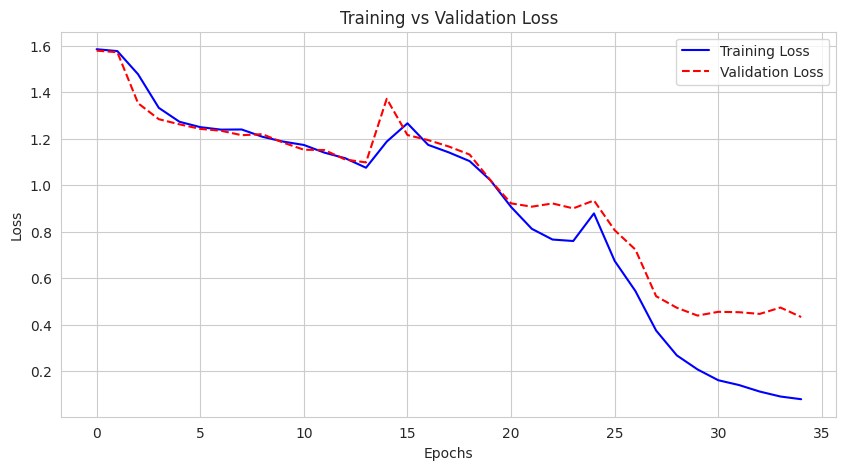

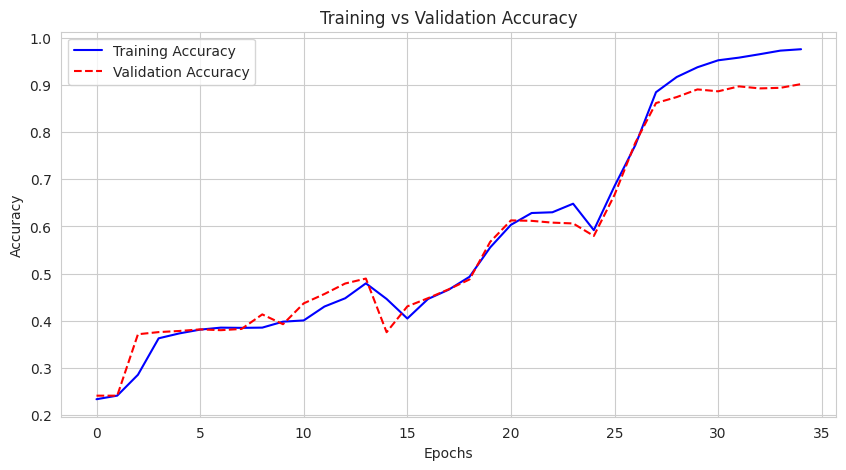

In [354]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1067
           1       0.89      0.92      0.90       924
           2       0.92      0.88      0.90       706
           3       0.90      0.90      0.90      1006
           4       0.89      0.91      0.90       476

    accuracy                           0.90      4179
   macro avg       0.90      0.90      0.90      4179
weighted avg       0.90      0.90      0.90      4179



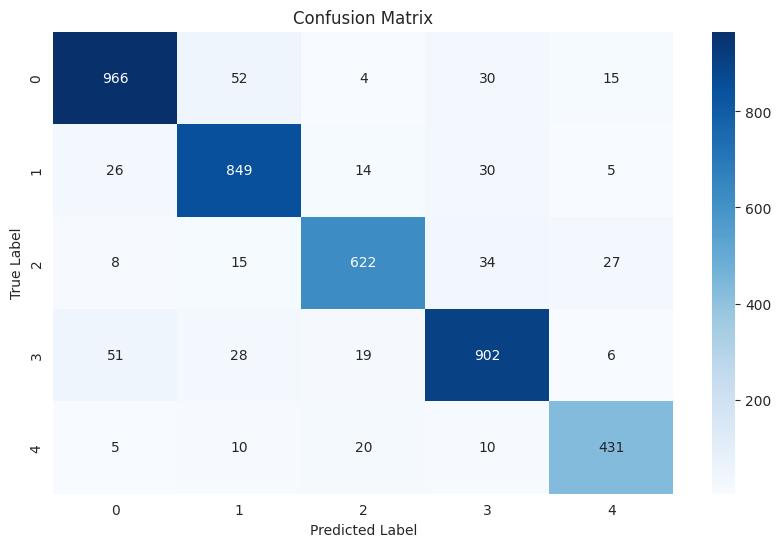

In [355]:



from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract unique class labels as strings
class_labels = list(map(str, sorted(df['Topic_NMF'].unique())))

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## LDA modeling

In [356]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Assume 'complaint_POS_removed' contains the cleaned text & 'Topic_LDA' has category labels
df_lda = lda_df

# Convert text to sequences
tokenizer = Tokenizer(num_words=25000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_lda['complaint_POS_removed'])
sequences = tokenizer.texts_to_sequences(df_lda['complaint_POS_removed'])

# Pad sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert numerical labels to categorical
num_classes = df_lda['Topic_LDA'].nunique()
y = to_categorical(df_lda['Topic_LDA'], num_classes=num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [357]:
# Build the BiLSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=25000, output_dim=128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multiclass classification
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35, batch_size=512)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 754ms/step - accuracy: 0.2813 - loss: 1.5500 - val_accuracy: 0.3008 - val_loss: 1.5185
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 756ms/step - accuracy: 0.2768 - loss: 1.5338 - val_accuracy: 0.2809 - val_loss: 1.5125
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 756ms/step - accuracy: 0.2906 - loss: 1.5160 - val_accuracy: 0.3168 - val_loss: 1.4607
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 744ms/step - accuracy: 0.3778 - loss: 1.3766 - val_accuracy: 0.3841 - val_loss: 1.3087
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 744ms/step - accuracy: 0.4016 - loss: 1.2951 - val_accuracy: 0.4279 - val_loss: 1.2675
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 764ms/step - accuracy: 0.3988 - loss: 1.3007 - val_accuracy: 0.1747 - val_loss: 1.5994
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 766ms/step - accuracy: 0.2525 - loss: 1.5619 - val_accuracy: 0.3010 - val_loss: 1.4835
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 774ms/step - accuracy: 0.3208 - loss: 1.4433 - val_accu

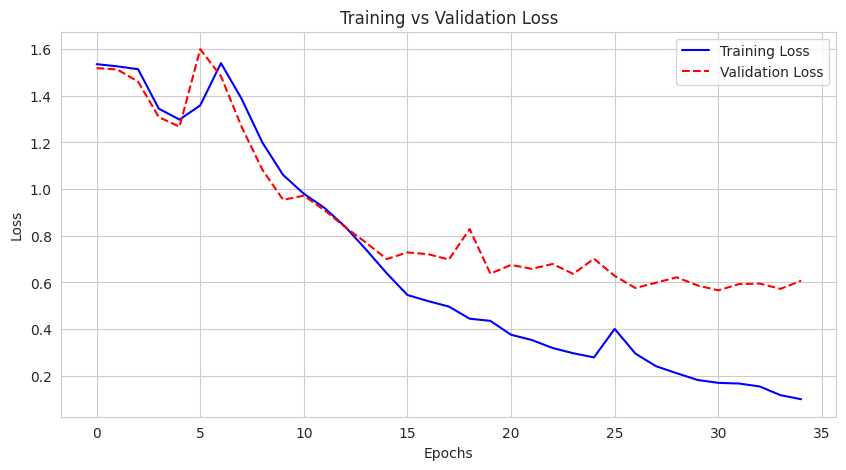

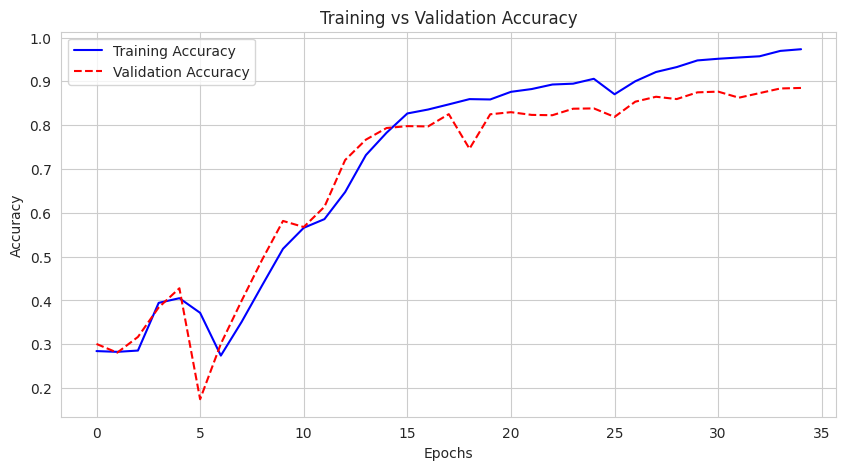

In [360]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       726
           1       0.95      0.90      0.92       716
           2       0.95      0.91      0.93      1257
           3       0.87      0.94      0.91      1173
           4       0.62      0.69      0.66       307

    accuracy                           0.88      4179
   macro avg       0.85      0.85      0.85      4179
weighted avg       0.89      0.88      0.89      4179



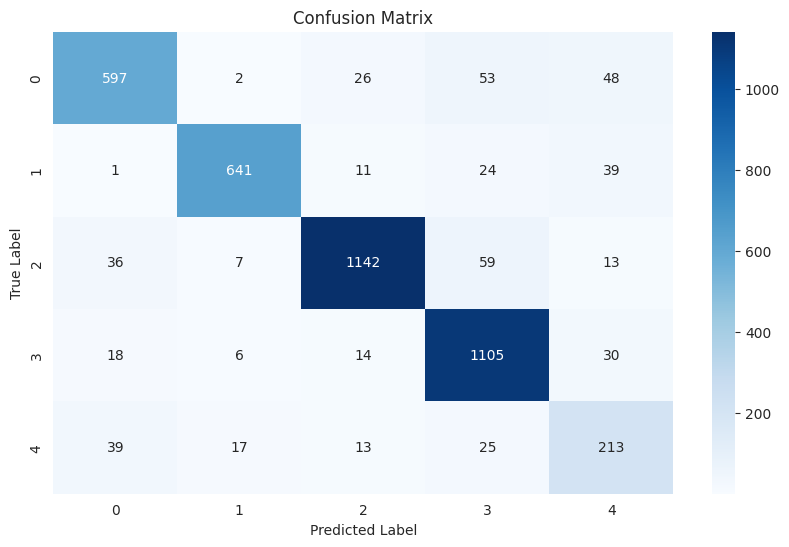

In [361]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract unique class labels as strings
class_labels = list(map(str, sorted(df_lda['Topic_LDA'].unique())))

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Conclusion

The objective of this study was to automate the classification of customer complaints into predefined categories using a combination of topic modeling and supervised deep learning. Since the complaint data was unstructured and lacked predefined labels, topic modeling was first applied to identify patterns and categorize complaints into meaningful clusters. The extracted topic distributions were then used to train a Bidirectional Long Short-Term Memory (BiLSTM) model for automated classification.

#### Model Performance Summary
**1. Topic Modeling Approaches**

- Non-Negative Matrix Factorization (NMF): Provided well-separated topic clusters with distinct keyword associations, leading to better topic coherence.

- Latent Dirichlet Allocation (LDA): Generated topic distributions but had some challenges in differentiating complaints in the "Others" category, affecting classification performance.

**2. Supervised Classification using BiLST**

- The NMF-based BiLSTM model achieved an accuracy of 90%, with balanced precision, recall, and F1-score across all five categories.

- The LDA-based BiLSTM model reached 88% accuracy, but had lower precision and recall, particularly in the "Others" category (F1-score of 66%).

- The results indicate that NMF provided more informative topic representations, making it the better choice for preprocessing before classification.

- Thus, the NMF-based BiLSTM model is recommended for automating customer complaint classification due to its superior accuracy and topic coherence.

# Recommendations
**1. Adopt NMF for Topic Modeling**
- NMF demonstrated better topic separability and higher classification accuracy. It should be the preferred technique for extracting complaint categories before training supervised models.

**2. Enhance Data Labeling for the "Others" Category**
- The "Others" category was harder to classify due to overlapping topics. A more granular labeling approach should be considered, possibly splitting it into subcategories.

**3. Deploy NMF-based BiLSTM for Automated Classification**
- Given its superior performance, the NMF-based BiLSTM model should be integrated into the customer support ticketing system to automatically classify complaints, reducing manual effort.

**4. Continuous Model Monitoring and Improvement**
- Periodically retrain the model with new data to improve accuracy as complaint patterns evolve.

- Implement a feedback loop where misclassified complaints can be corrected and used to enhance future training data.

